In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\VARKEY JOSHY T\Downloads\Employee.csv")

# List unique values and their counts for each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print("Unique Values and Counts:")
    print(df[col].value_counts())
    
    # Calculate statistics
    print("\nStatistics:")
    print(df[col].describe())

# Rename columns
df = df.rename(columns={
    'age': 'Employee_Age',
    'salary': 'Annual_Salary',
    'place': 'Work_Location'
})


Column: Company
Unique Values and Counts:
Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

Statistics:
count     140
unique      6
top       TCS
freq       53
Name: Company, dtype: object

Column: Age
Unique Values and Counts:
Age
22.0    16
33.0    13
44.0    10
23.0     8
34.0     8
21.0     8
32.0     7
35.0     6
0.0      6
41.0     5
45.0     4
43.0     4
24.0     4
20.0     3
31.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

Statistics:
count    130.000000
mean      30.484615
std       11.096640
min        0.000000
25%       22.000000
50%       32.500000
75%       37.750000
max       54.000000
Name: Age, dtype: float64

Column: Salary
Unique Values and Counts:
Sala

In [7]:
# Find missing and inappropriate values
print("\nMissing and inappropriate values:")
print(df.isnull().sum())
print(df[df['Age'] < 18]['Age'].count() + df[df['Age'] > 100]['Age'].count())

# Remove duplicates
df = df.drop_duplicates()

# Replace 0 in age with NaN
df['Age'] = df['Age'].replace(0, np.nan)

# Treat null values
numeric_columns = ['Age', 'Salary']
categorical_columns = ['Place']

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Identify and handle outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
if not outliers.empty:
    print("\nOutliers found:")
    print(outliers)
else:
    print("\nNo outliers found.")


Missing and inappropriate values:
Company    8
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64
1

No outliers found.


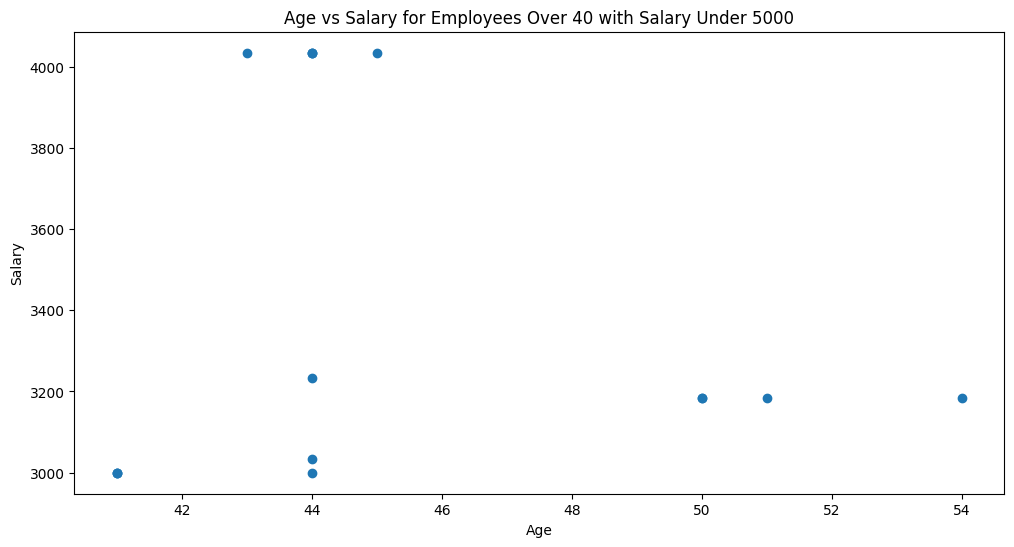

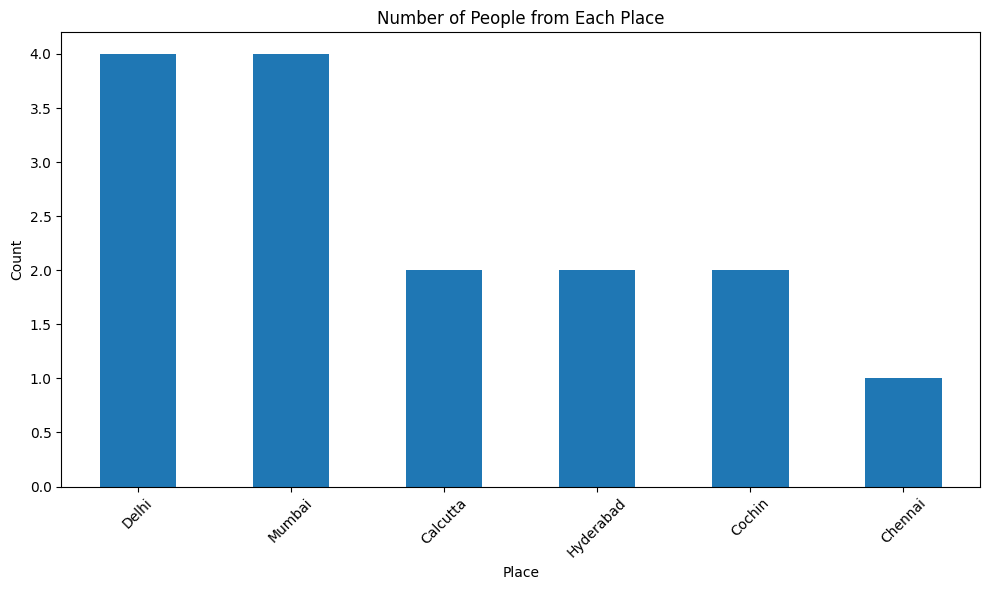

In [10]:
# Filter data
filtered_df = df[df['Age'] > 40]
filtered_df = filtered_df[filtered_df['Salary'] < 5000]

# Plot chart with age and salary
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary for Employees Over 40 with Salary Under 5000')
plt.show()

# Count people from each place
place_counts = filtered_df['Place'].value_counts()
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Separate categorical and numerical columns
categorical_cols = ['Place']
numerical_cols = ['Age', 'Salary']

# Create encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded data with original numerical columns
final_encoded_df = pd.concat([encoded_data, df[numerical_cols]], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target variable
features = final_encoded_df.drop('Salary', axis=1)
target = final_encoded_df['Salary']

# Apply StandardScaler
standard_scaler = StandardScaler()
scaled_features_standard = standard_scaler.fit_transform(features)

# Apply MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_features_minmax = min_max_scaler.fit_transform(features)

# Combine scaled features with target
scaled_df_standard = pd.concat([pd.DataFrame(scaled_features_standard, columns=features.columns), target], axis=1)
scaled_df_minmax = pd.concat([pd.DataFrame(scaled_features_minmax, columns=features.columns), target], axis=1)

print("StandardScaler applied:")
print(scaled_df_standard.describe())

print("\nMinMaxScaler applied:")
print(scaled_df_minmax.describe())

StandardScaler applied:
       Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
count  1.440000e+02    1.440000e+02   1.440000e+02  1.440000e+02   
mean  -3.083953e-17    6.167906e-17   6.167906e-18 -3.700743e-17   
std    1.003490e+00    1.003490e+00   1.003490e+00  1.003490e+00   
min   -8.362420e-02   -5.345225e-01  -3.281651e-01 -3.150185e-01   
25%   -8.362420e-02   -5.345225e-01  -3.281651e-01 -3.150185e-01   
50%   -8.362420e-02   -5.345225e-01  -3.281651e-01 -3.150185e-01   
75%   -8.362420e-02   -5.345225e-01  -3.281651e-01 -3.150185e-01   
max    1.195826e+01    1.870829e+00   3.047247e+00  3.174417e+00   

        Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nagpur  \
count  1.440000e+02     1.440000e+02  1.440000e+02  1.440000e+02   
mean   3.083953e-18    -4.934325e-17  7.401487e-17 -3.083953e-17   
std    1.003490e+00     1.003490e+00  1.003490e+00  1.003490e+00   
min   -3.281651e-01    -2.425356e-01 -7.071068e-01 -8.362420e-02   
25%   -3.281651e-01    